In [19]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('wnba.csv')

In [4]:
dataset.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


#  SRS (Simple Random Sampling)

In [5]:
parameter = dataset['Games Played'].max()

32

In [6]:
dataset.shape

(143, 32)

In [9]:
#  take out sample data with count 10 adnd random state is 1
sampling error = dataset.sample(10,random_state=1)['Games Played'].max()

30

In [39]:
population_mean = dataset['PTS'].mean()

In [40]:
population_mean

201.7902097902098

In [47]:
sample_means= []
for i in range(100):
    data = dataset.sample(20,random_state=i)['PTS'].mean()
    sample_means.append(data)


In [48]:
sample_means

[195.35,
 184.1,
 145.55,
 250.05,
 182.9,
 202.7,
 247.1,
 164.45,
 244.7,
 256.3,
 215.6,
 182.3,
 215.35,
 253.95,
 184.55,
 209.45,
 156.05,
 224.45,
 210.0,
 214.05,
 190.45,
 257.4,
 134.6,
 201.9,
 197.7,
 191.85,
 200.95,
 176.7,
 176.5,
 207.4,
 188.45,
 189.85,
 196.9,
 130.6,
 257.0,
 170.95,
 161.2,
 168.85,
 182.8,
 151.7,
 167.45,
 203.95,
 247.35,
 227.3,
 234.45,
 182.1,
 242.15,
 237.55,
 216.35,
 204.3,
 148.6,
 158.65,
 208.75,
 197.0,
 221.55,
 196.75,
 164.85,
 247.1,
 230.65,
 207.95,
 235.0,
 268.25,
 122.95,
 169.2,
 182.5,
 156.85,
 172.65,
 161.85,
 210.85,
 207.2,
 212.2,
 190.4,
 164.85,
 159.15,
 193.7,
 218.15,
 256.25,
 176.45,
 209.55,
 175.65,
 179.15,
 215.4,
 209.4,
 234.9,
 211.75,
 196.6,
 210.15,
 237.95,
 183.25,
 184.05,
 184.55,
 250.8,
 193.05,
 205.8,
 187.55,
 216.7,
 164.45,
 179.8,
 183.4,
 135.75]

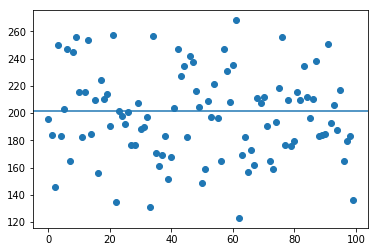

In [49]:
plt.scatter(range(100),sample_means)
plt.axhline(population_mean)

In [58]:
dataset['Pos'].value_counts(normalize =True)

G      0.419580
F      0.230769
C      0.174825
G/F    0.090909
F/C    0.083916
Name: Pos, dtype: float64

In [60]:
dataset.sample(30,random_state=27)['Pos'].value_counts(normalize = True)

G      0.466667
C      0.233333
G/F    0.100000
F/C    0.100000
F      0.100000
Name: Pos, dtype: float64

In [61]:
dataset.sample(30,random_state=28)['Pos'].value_counts(normalize = True)

G      0.533333
F      0.200000
C      0.133333
G/F    0.066667
F/C    0.066667
Name: Pos, dtype: float64

# SSS Stratified Sampling

In [86]:
G = dataset[dataset['Pos'] == 'G']
F = dataset[dataset['Pos'] == 'F']
C = dataset[dataset['Pos'] == 'C']
G_F = dataset[dataset['Pos'] == 'G/F']
F_C = dataset[dataset['Pos'] == 'F/C']

In [73]:
key = dict(dataset['Pos'].value_counts(normalize = True))

In [74]:
pos_values = list(key.keys())

In [75]:
pos_values

['G', 'F', 'C', 'G/F', 'F/C']

In [79]:
sizes = []
for x in key.items():
    sizes.append(round(30*x[1],0))

In [92]:
sizes = [int(x) for x in sizes]
sizes

[13, 7, 5, 3, 3]

In [96]:
g_sample = G.sample(13,random_state=0)
f_sample = F.sample(7,random_state=0)
c_sample = C.sample(5,random_state=0)
gf_sample = G_F.sample(3,random_state=0)
fC_sample = F_C.sample(3,random_state=0)

In [100]:
dataset['Weight_deviation']  = round(dataset['Weight'].mean() - dataset['Weight'],1)

In [101]:
dataset.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,Weight_deviation
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,22,28,12,3,6,12,93,0,0,8.0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,82,101,72,63,13,40,217,0,0,6.0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,36,40,78,22,3,24,218,0,0,10.0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,134,169,65,20,10,38,188,2,0,-5.0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,9,12,12,7,0,14,50,0,0,1.0


In [102]:
dataset['Weight_deviation'].value_counts()

 2.0     10
-5.0      9
 13.0     8
-7.0      7
-8.0      6
-9.0      6
-0.0      6
 6.0      6
 15.0     5
-2.0      5
 1.0      5
 4.0      4
-4.0      4
 14.0     4
 5.0      4
 3.0      4
-3.0      4
-1.0      3
-12.0     3
 16.0     3
-10.0     3
 9.0      3
-14.0     3
 10.0     2
-34.0     2
 11.0     2
-25.0     2
-16.0     2
-6.0      2
-11.0     2
 20.0     2
-17.0     2
 8.0      2
-18.0     1
 17.0     1
-29.0     1
 22.0     1
 12.0     1
 21.0     1
 24.0     1
Name: Weight_deviation, dtype: int64